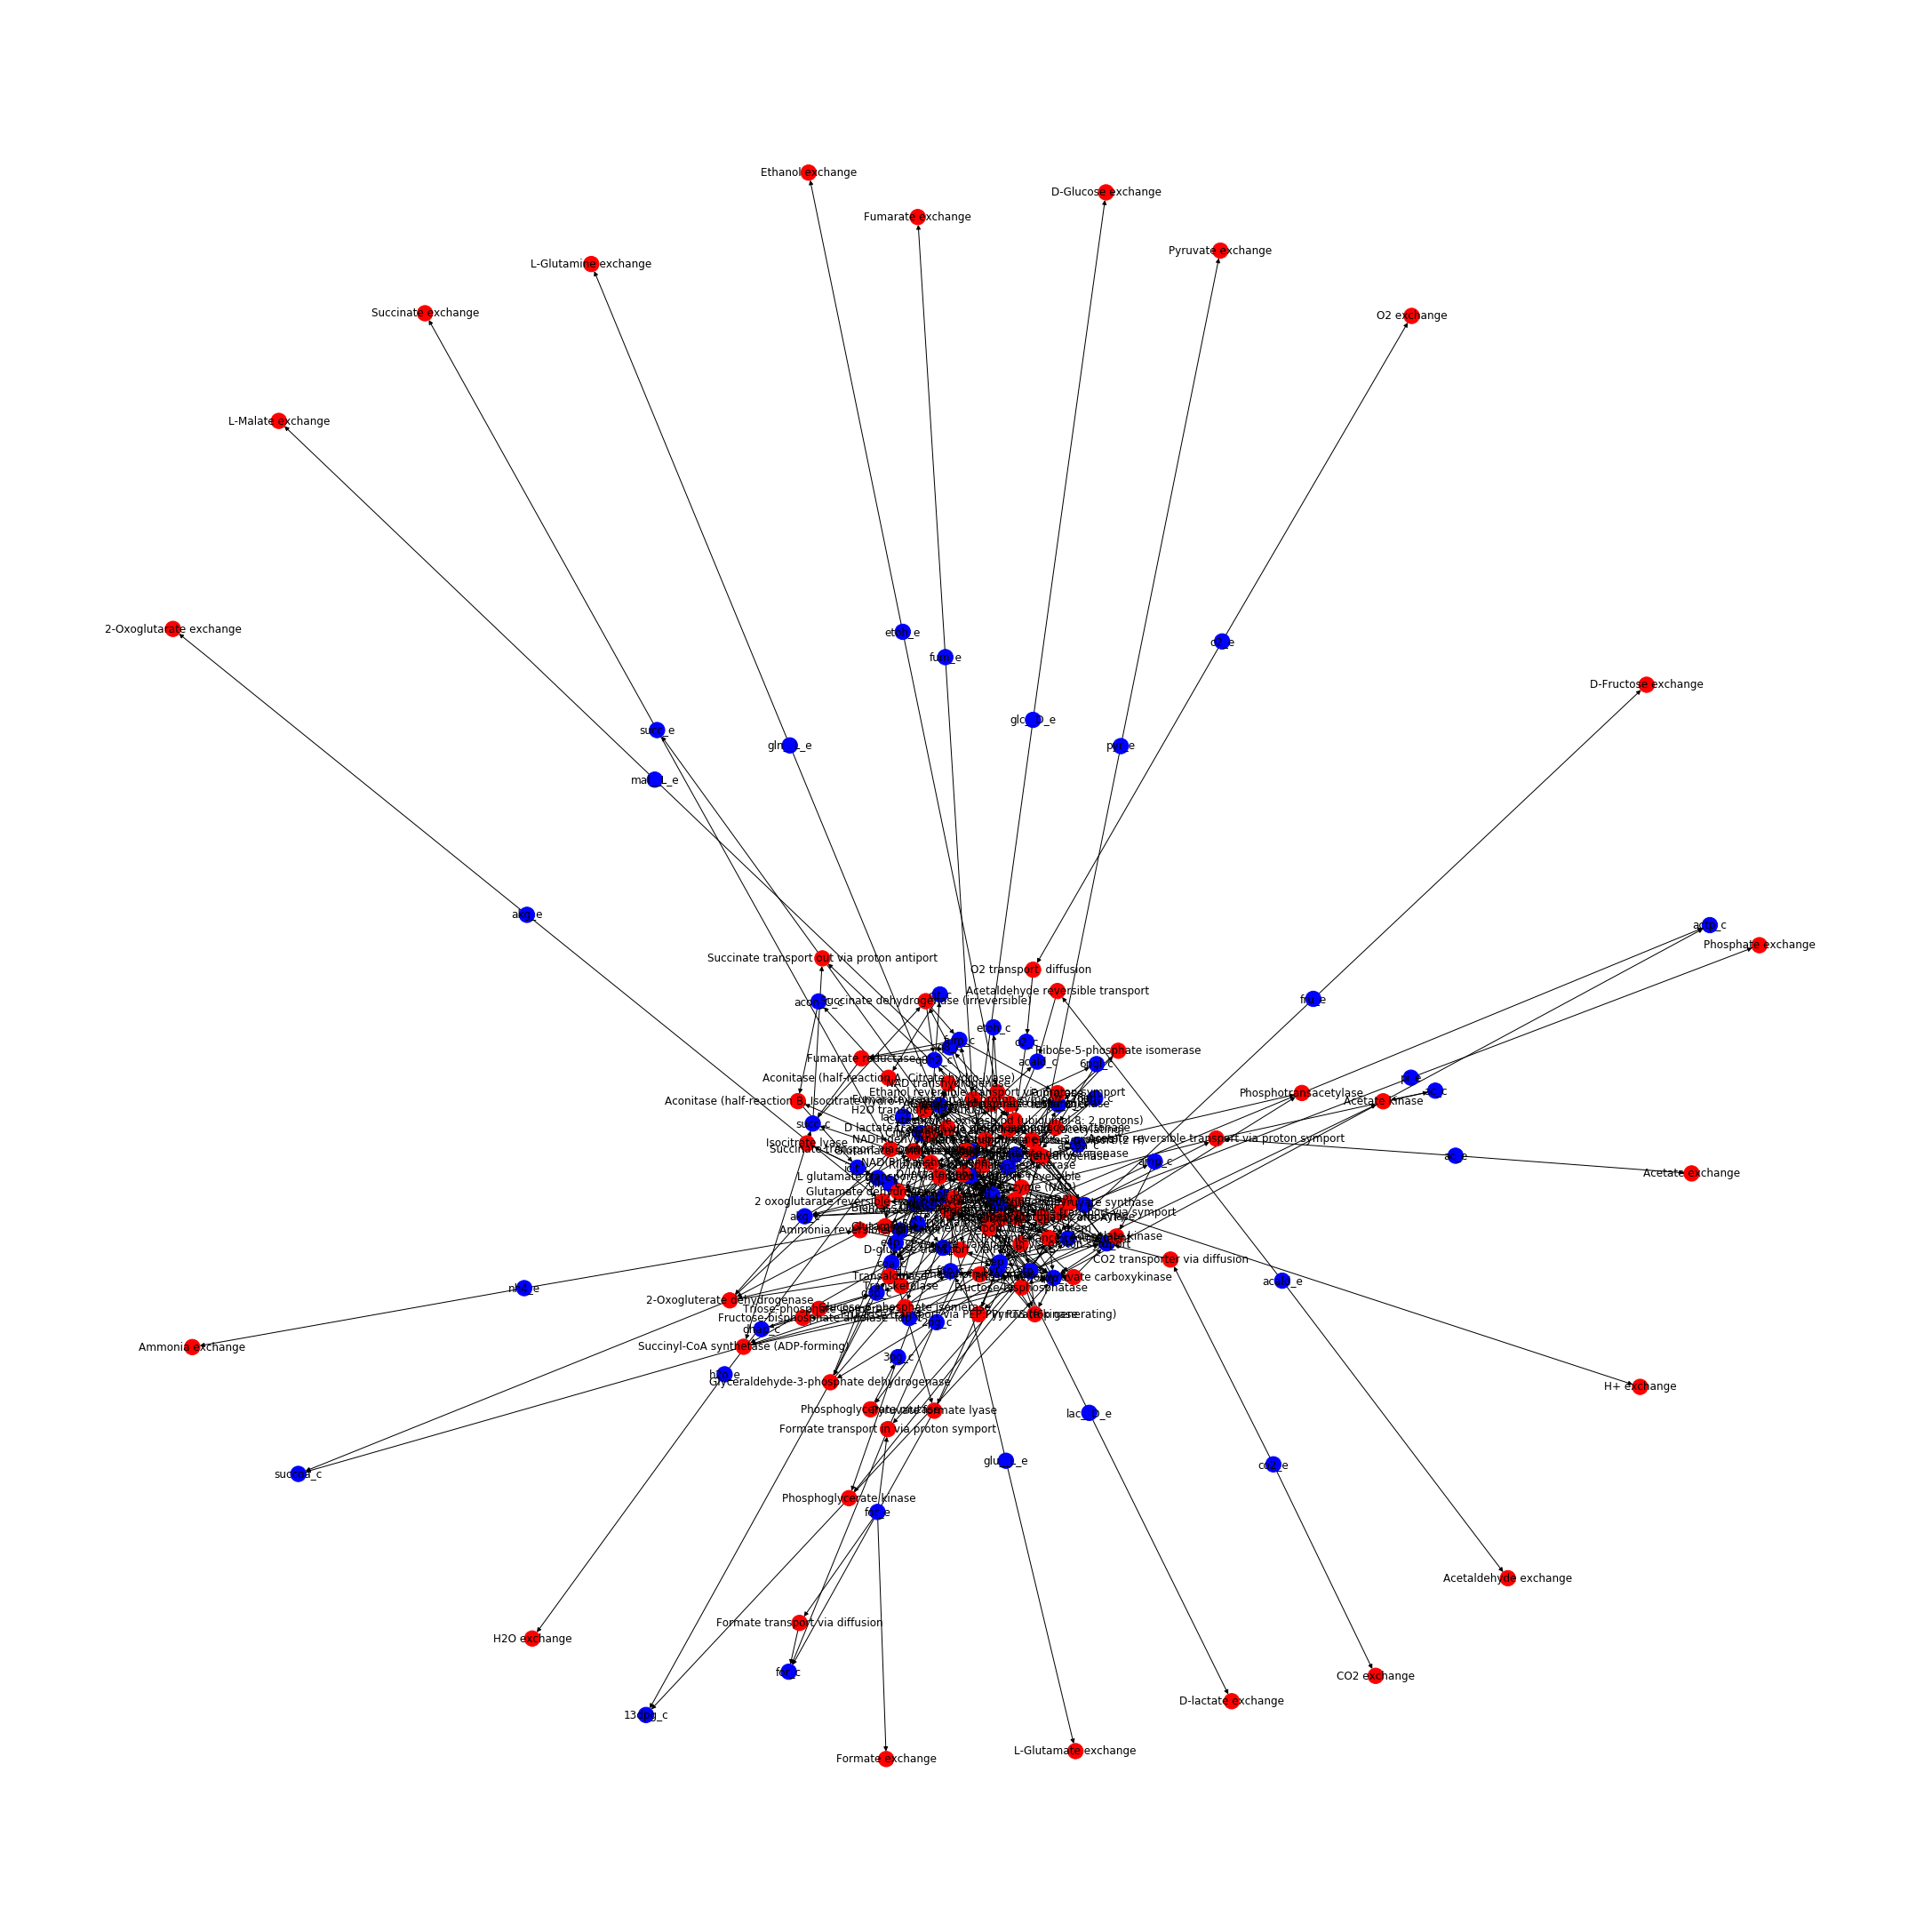

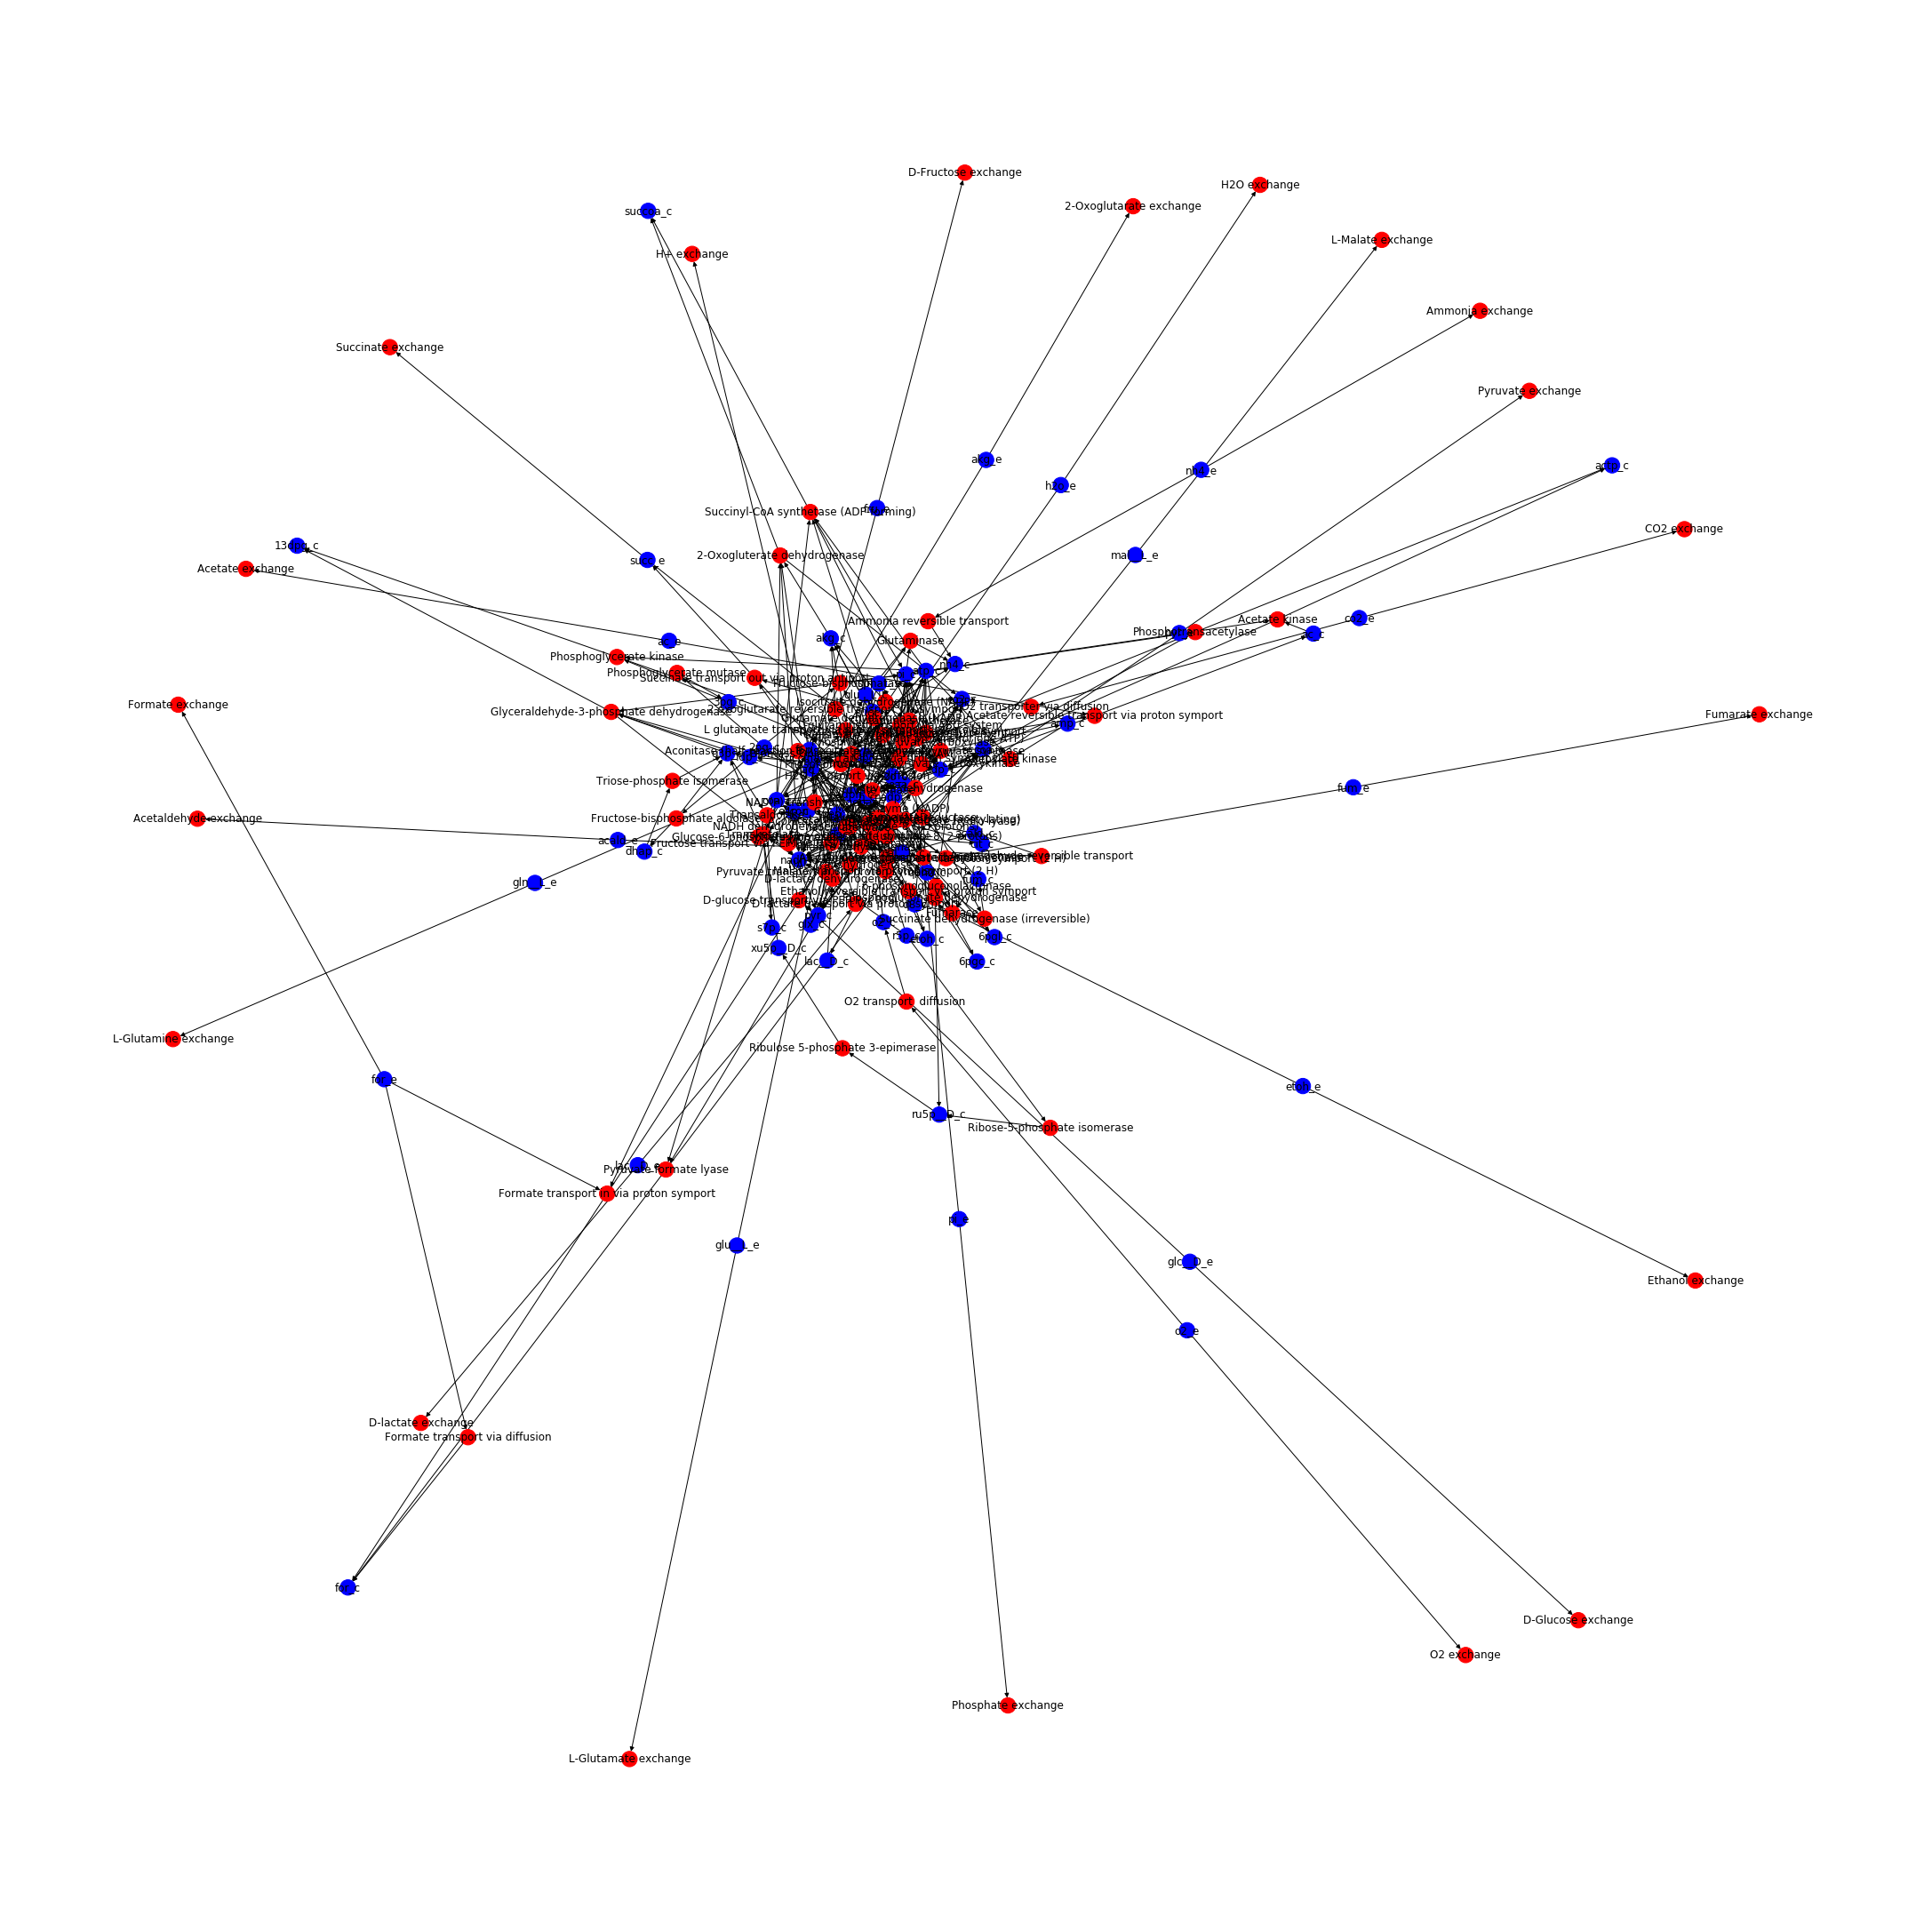

['adp_c', 'atp_c', 'adp_c', 'atp_c', 'adp_c', 'h2o_c', '6pgc_c', 'co2_c', 'h_c', 'pyr_c', 'accoa_c', 'coa_c', 'accoa_c', 'coa_c', 'accoa_c', 'adp_c', 'pyr_c', 'amp_c', 'adp_c', 'pyr_c', 'h_c', 'h2o_c', 'h_c', 'h2o_c', 'h_c', 'h2o_c', 'h_c', 'glu__L_c', 'akg_c', 'nadh_c', 'h_c', 'glu__L_c', 'akg_c', 'nadh_c', 'h_c', 'glu__L_c', 'akg_c', 'nadh_c', 'h_c', 'nadp_c', 'h_c', 'h_e', 'h_c', 'h_e', 'h_c', 'nad_c', 'nadp_c', 'nadph_c', 'nadp_c', 'ru5p__D_c', 'xu5p__D_c', 'g3p_c', 'e4p_c', 'g3p_c', 'f6p_c']


In [6]:
import networkx as nx
import json
import matplotlib.pyplot as plt
# Use of any function from networkx.algorithms module is strictly not allowed.
# Matplotlib can be used for visualization purposes

# Add your functions here if needed

f = open('e_coli_core.json',)
data = json.load(f)
def construct_metabolic_graph(name_of_json_file):
    """
    Given the reaction dict, return the metabolic directed bi-partite networkx graph
    """
    pass
    f = open(name_of_json_file,)
    data = json.load(f)
    plt.figure(figsize = (30,30))
    DG = nx.DiGraph()
    reactions = [x['name'] for x in data['reactions']]

    for i in data['reactions']:
        DG.add_node(i['name'])
        d = i['metabolites']
        for p in d.keys():
            if(d[p]<0):
                if(p not in DG.nodes()):
                    DG.add_node(p)
                DG.add_edge(p,i['name'])
            else:
                if(p not in DG.nodes()):
                    DG.add_node(p)
                DG.add_edge(i['name'],p)

    cmap = ['red' if node in reactions else 'blue' for node in DG]
    nx.draw(DG, with_labels=True, node_color = cmap)
    plt.show()
    return DG

def Find_Cycles_In_Metabolic_Graph(Graph):
    """
    Given a bi-partite networkx graph, return the list of list of metabolites involved in the cycle i.
    """
    pass
    DG = construct_metabolic_graph('e_coli_core.json')
    enzymes = [x['name'] for x in data['reactions']]
    def DFS(node,p): #Implementing DFS and checking for cycles
    
        if p[-1]==source:
            cyclic.append(p)
        if state[node]==0:
            return
        state[node] = state[node] - 1
        for n in DG.neighbors(node):
            DFS(n,p+[n])
    cycles= []
    for i in DG:
        cyclic = []
        source = i
        state = {node : len(list(DG.predecessors(node))) for node in DG}
        DFS(source,[source])
        p = []
        for elements in cyclic:
            for i in elements:
                if(len(elements))>1:
                    if(i not in enzymes):
                        p.append(i)
            cycles.append(p)
            p = []
    return cycles
    



# For the purpose of parsing, look under "metabolites" sub-section of "reaction" section. The stoichiometric coefficients will help you in determining if a metabolite is a reactant or a product.
G = construct_metabolic_graph("e_coli_core.json")
# Add code to visualized G below


cycles = Find_Cycles_In_Metabolic_Graph(G)
print(cycles[3])